In [1]:
import pandas as pd
import ast  # For safely evaluating the string representation of dictionaries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata


In [2]:

def load_experiment_data(file_path):
    """
    Load the experimental data from CSV and parse the parameters column.

    Args:
        file_path (str): Path to the CSV file

    Returns:
        pd.DataFrame: Processed DataFrame with parsed parameters
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Parse the 'params' column from string to dictionary
    df['params'] = df['params'].apply(ast.literal_eval)

    # Create separate columns for each parameter
    param_df = pd.json_normalize(df['params'])

    # Combine the original DataFrame with the parsed parameters
    result_df = pd.concat([df.drop('params', axis=1), param_df], axis=1)

    return result_df


In [3]:
def create_3d_scatter(df, x_col, y_col, z_col):
    """
    Create a 3D scatter plot from three columns of the DataFrame.
    Points are colored based on the 'value' column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data
        x_col (str): Column name for x-axis
        y_col (str): Column name for y-axis
        z_col (str): Column name for z-axis
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    scatter = ax.scatter(df[x_col],
                        df[y_col],
                        df[z_col],
                        c=df['value'],  # Color based on value
                        cmap='viridis',  # Color map
                        s=100)  # Point size

    # Add labels and title
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title(f'3D Scatter Plot of {x_col} vs {y_col} vs {z_col}')

    # Add a color bar
    plt.colorbar(scatter, label='Value')

    # Adjust the viewing angle for better visualization
    ax.view_init(elev=20, azim=60)

    plt.tight_layout()
    plt.show()

In [5]:
df = load_experiment_data('gpatlas/optuna/optuna_trials_gg_20250308_014955.csv')
#df = load_experiment_data('optuna/test_sim_WF_null_10000n_5000000bp_gg_optuna.csv')
df.head(n=3)

,trial_number,value,state,latent_space_g,gen_noise,learning_rate,num_epochs,weights_regularization
0,0,0.343684,COMPLETE,3500,0.476653,0.000804,6,0.000030
1,1,0.332609,COMPLETE,3500,0.832023,0.000198,6,0.000476
2,2,0.334096,COMPLETE,3500,0.799450,0.000091,6,0.000010


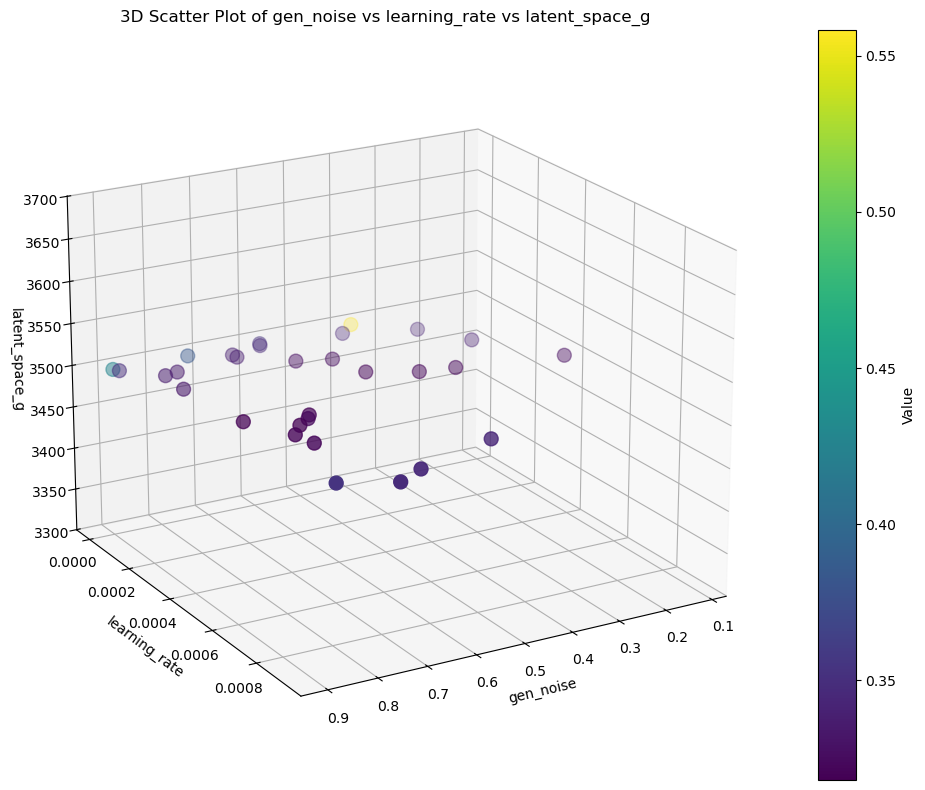

In [6]:
create_3d_scatter(df,
                    y_col='learning_rate',
                    x_col='gen_noise',
                    z_col='latent_space_g')

In [7]:
df2 = load_experiment_data('optuna/test_sim_WF_null_10000n_5000000bp_gp_optuna.csv')
df2.head(n=3)

,trial_number,value,state,latent_space_p,learning_rate,phen_noise,gen_noise,num_epochs_pp,num_epochs_gp,weights_regularization
0,0,1.967297,COMPLETE,513,0.000003,0.003639,0.251670,11,5,0.000012
1,1,1.960905,COMPLETE,422,0.003928,0.796658,0.152641,20,5,0.005919
2,2,1.971650,COMPLETE,21,0.000012,0.077138,0.377452,13,3,0.000031


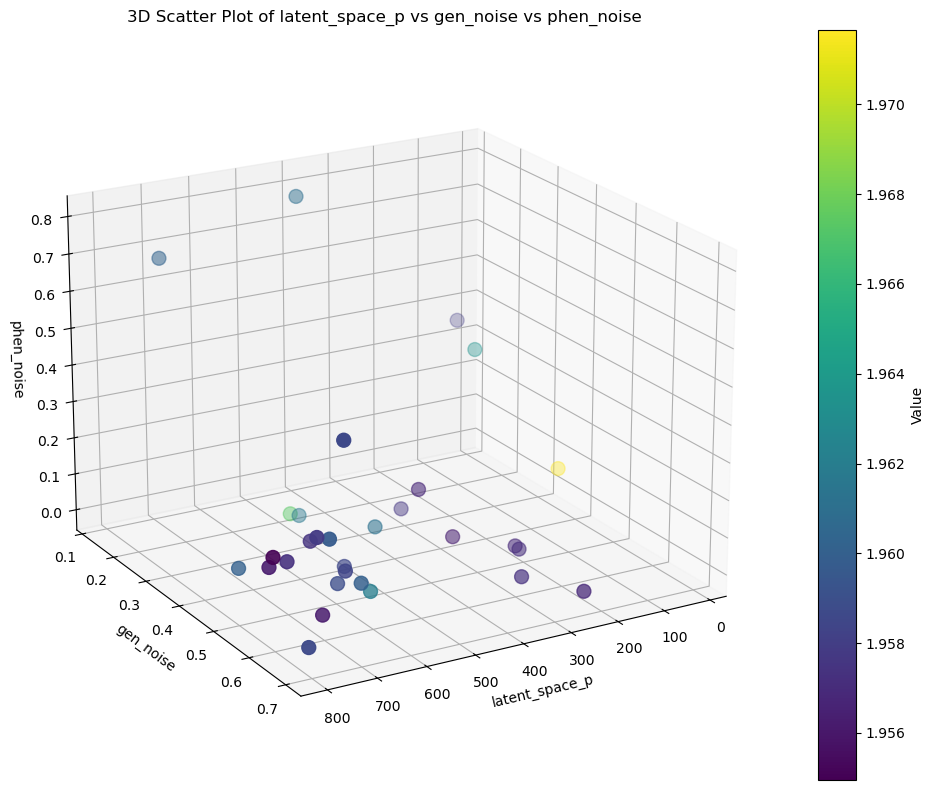

In [8]:
create_3d_scatter(df2,
                    z_col='phen_noise',
                    y_col='gen_noise',
                    x_col='latent_space_p')